<a href="https://www.kaggle.com/code/minhbtnguyen/gaussian-naive-bayes-classifier-for-uci-dataset?scriptVersionId=126839333" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Gaussian Naive Bayes Classifier for Breast Cancer Dataset
- Implement a simple program using GaussianNB() to classify the data samples (including train and test data samples). Report the prediction accuracy and confusion matrix of the classifier.
- Add (30-dimensional) zero-mean Gaussian noises with different variances (at least 5, e.g., 50, 100, 200, 400, 800) to the features of the dataset; train Gaussian Naïve Bayes classifiers to classify the noisy datasets and report the prediction accuracies and confusion matrices of the classifiers.

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
import os
import math

In [2]:
# connect to Kaggle open-source database
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/breast-cancer-wisconsin-data/data.csv


# 1. Data Processing 

In [3]:
# import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Note**: we will drop *id* and *Unnamed* columns as they does not contribute to the learning process of the model.

## 1.1. Data Visualization
Let's plot the malignent and benign cancer data points.

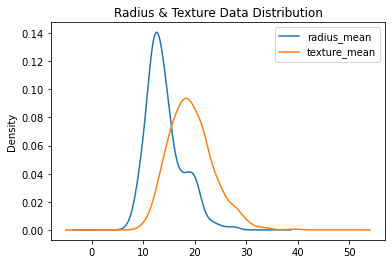

In [5]:
# plot the distribution of points
plt.title("Radius & Texture Data Distribution")
df['radius_mean'].plot(kind='kde')
df['texture_mean'].plot(kind='kde')
plt.legend()
plt.show()

## 1.2. Data Processing

In [6]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [7]:
# Examine and replace missing values 
print(df.isnull().values.any())

False


**Note**: split the dataset into input features and labels.

In [8]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [9]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [11]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [12]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [13]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 2. Gaussian Naive Bayes On Original Dataset

## 2.1. Create Model

In [14]:
# create model
gnb1 = GaussianNB()

## 2.2. Train Model

In [15]:
# train model on training dataset
gnb1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

 as there are many features, I only choose the radius and texture mean column so that we can, later on, ## 2.3. Test Model

In [16]:
# predict on validate set
y_test_pred = gnb1.predict(X_test)

# predict on train set
y_train_pred = gnb1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.231156
Validating MSE = 0.350877
F1 Score = 0.883721
Precision Score = 0.863636
Recall Score = 0.904762
ROC-AUC Score = 0.910714

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[99  9]
 [ 6 57]]
True Negative: 99
False Positive: 9
False Negative: 6
True Positive: 57


# 3. Gaussian Naive Bayes On Noisy Dataset

## 3.1. Data Processing

In [17]:
# re-import dataset
df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
# drop columns
df = df.drop(['id'], axis=1)
df = df.drop(['Unnamed: 32'], axis=1)

In [19]:
# convert character into numerical value for easily calculate the 
df['diagnosis'] = [1 if i == 'M' else 0 for i in df['diagnosis']]

In [20]:
# split the dataset into input features and target label
X = df.drop(["diagnosis"], axis=1)
y = df['diagnosis'].to_numpy().reshape(-1, 1)

In [21]:
# check shapes
print(X.shape)
print(y.shape)

(569, 30)
(569, 1)


In [22]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# create noisy Gaussian-distributed noisy data with same matrix size
# Reference: https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

# zero-mean noise with variance 50
noise_1 = np.random.normal(loc=0, scale=math.sqrt(50), size=[569, 30]) 
noise_1_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_1 = noise_1_scaler.fit_transform(noise_1)

# zero-mean noise with variance 100
noise_2 = np.random.normal(loc=0, scale=math.sqrt(100), size=[569, 30]) 
noise_2_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_2 = noise_2_scaler.fit_transform(noise_2)

# zero-mean noise with variance 200
noise_3 = np.random.normal(loc=0, scale=math.sqrt(200), size=[569, 30]) 
noise_3_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_3 = noise_3_scaler.fit_transform(noise_3)

# zero-mean noise with variance 400
noise_4 = np.random.normal(loc=0, scale=math.sqrt(400), size=[569, 30]) 
noise_4_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_4 = noise_4_scaler.fit_transform(noise_4)

# zero-mean noise with variance 800
noise_5 = np.random.normal(loc=0, scale=math.sqrt(800), size=[569, 30]) 
noise_5_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
noise_5 = noise_5_scaler.fit_transform(noise_5)

In [24]:
# data normalization
X_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = X_scaler.fit_transform(X)

y_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = y_scaler.fit_transform(y)

In [25]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
X_train.shape

(398, 30)

## 3.2. Case 1: Add Noise 1 To The Dataset

### 3.2.1. Data Processing

In [27]:
# add noise to dataset
X1 = X + noise_1

In [28]:
# view dataset
pd.DataFrame(X1).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.126270,-1.110531,-0.007026,-0.303244,0.024002,1.140858,0.549459,0.384024,0.482264,-0.303921,...,-0.049992,-0.826823,0.578758,0.031837,0.190550,0.272302,0.380020,0.869114,0.010012,0.020819
1,0.189088,-0.448593,0.364193,-0.298990,-0.286857,-0.778470,-0.323517,-0.297881,-0.220494,-0.822122,...,0.458570,-0.560239,0.468193,0.510043,0.166655,-0.979187,-1.078091,-0.314602,0.245285,-1.114794
2,0.481786,-0.149166,-0.586970,0.347040,-0.098243,-0.035072,-0.042280,-0.546681,0.161912,-0.426477,...,0.597483,-0.411190,0.791824,0.332046,0.160223,-0.160606,0.070992,0.028139,0.550388,-0.762479
3,-0.736532,-0.145543,-0.544500,-0.648242,0.592475,0.239700,0.249211,0.387375,0.591134,0.725437,...,-0.597977,-0.221995,-0.286596,-1.073839,0.980148,0.783744,0.429560,0.774854,0.719445,1.106187
4,0.322568,-0.810090,0.324956,0.648092,0.045646,-0.775077,0.181427,-0.475853,-0.163796,-1.418646,...,0.640525,-1.438342,0.025892,-0.282299,0.421039,-0.790535,0.105809,0.414066,-1.060105,-0.250336


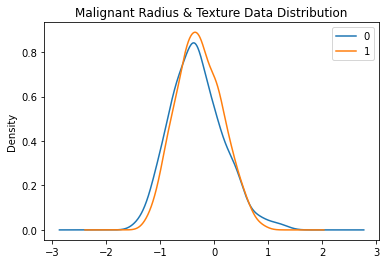

In [29]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X1)[0].plot(kind='kde')
pd.DataFrame(X1)[1].plot(kind='kde')
plt.legend()
plt.show()

In [30]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

### 3.2.2. Create Model

In [31]:
# create model
gnb2_1 = GaussianNB()

### 3.2.3. Train Model

In [32]:
# train model on training dataset
gnb2_1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.2.4. Test Model

In [33]:
# predict on validate set
y_test_pred = gnb2_1.predict(X_test)

# predict on train set
y_train_pred = gnb2_1.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.211055
Validating MSE = 0.397661
F1 Score = 0.868217
Precision Score = 0.848485
Recall Score = 0.888889
ROC-AUC Score = 0.898148

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.900585
Confusion Matrix = 
[[98 10]
 [ 7 56]]
True Negative: 98
False Positive: 10
False Negative: 7
True Positive: 56


## 3.3. Case 2: Add Noise 2 To The Dataset

### 3.3.1. Data Processing

In [34]:
# add noise to dataset
X2 = X + noise_2

In [35]:
# view dataset
pd.DataFrame(X2).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.005302,-1.161294,0.768712,-0.338370,1.187506,1.334009,-0.237477,0.005271,0.348229,0.034312,...,0.032394,-0.876213,0.443732,0.332819,0.462950,0.139190,-0.006962,0.934601,0.338745,-0.593149
1,0.578514,-0.470676,0.443307,-0.061545,-0.328410,-0.344389,-0.659986,-0.121473,-0.508591,-0.545337,...,-0.542446,-0.841058,-0.120257,-0.297088,-0.531081,-0.417345,-0.466848,0.656094,0.134147,-0.280800
2,-0.309155,0.288175,-0.267914,-0.016481,0.040426,0.176696,-0.006364,0.208805,0.259565,-0.189794,...,0.309313,0.066966,-0.016480,0.102671,0.147124,0.151171,-0.737543,0.477075,0.159220,-0.651066
3,-0.515606,-0.505064,-0.105015,-1.418176,1.221362,0.901688,-0.308234,-0.378449,1.429560,1.113054,...,-0.809062,-0.472988,-0.568945,-1.295876,1.070417,0.411363,-0.535571,0.416068,0.555380,0.935664
4,0.306494,-0.483690,0.724329,-0.149063,-0.792120,-0.278693,0.444138,-0.266163,-0.363965,-0.569125,...,-0.283704,-0.670458,0.074418,-0.176685,0.406208,-0.546489,-0.404804,0.709450,-0.166471,-0.605973


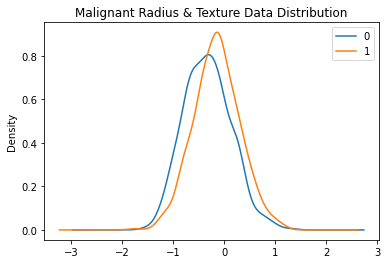

In [36]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X2)[0].plot(kind='kde')
pd.DataFrame(X2)[1].plot(kind='kde')
plt.legend()
plt.show()

In [37]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=0)

### 3.3.2. Create Model

In [38]:
# create model
gnb2_2 = GaussianNB()

### 3.3.3. Train Model

In [39]:
# train model on training dataset
gnb2_2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.3.4. Test Model

In [40]:
# predict on validate set
y_test_pred = gnb2_2.predict(X_test)

# predict on train set
y_train_pred = gnb2_2.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.321608
Validating MSE = 0.374269
F1 Score = 0.873016
Precision Score = 0.873016
Recall Score = 0.873016
ROC-AUC Score = 0.899471

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.906433
Confusion Matrix = 
[[100   8]
 [  8  55]]
True Negative: 100
False Positive: 8
False Negative: 8
True Positive: 55


## 3.4. Case 3: Add Noise 3 To The Dataset

### 3.4.1. Data Processing

In [41]:
# add noise to dataset
X3 = X + noise_3

In [42]:
# view dataset
pd.DataFrame(X3).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-0.032958,-0.794243,0.598081,-0.058654,0.100836,0.724318,0.883315,0.474352,0.254205,0.111639,...,0.033307,-1.082788,0.752867,-0.235297,-0.119112,0.334319,-0.072728,1.426563,0.287918,0.026466
1,0.599649,-0.057484,0.635371,-0.285459,-0.405890,0.031599,-0.837624,0.206529,-0.162603,-0.967117,...,-0.614105,-0.347218,0.592848,0.170002,-0.521062,-0.553965,-0.156289,0.629397,-0.157946,-0.935066
2,0.165323,-0.075222,0.057676,-0.469331,-0.332834,0.269304,-0.784644,-0.070982,-0.181733,-0.937092,...,0.999512,-0.243144,-0.051226,-0.210808,-0.665580,0.348434,-0.235459,0.533087,0.206608,-0.252078
3,-0.728188,0.030365,-1.312551,-0.375854,0.781169,-0.014527,0.158951,-0.186857,1.080793,0.824824,...,-0.436308,0.329878,-0.295299,-1.101999,0.862652,0.782393,0.522777,0.809835,0.946445,1.177813
4,0.662869,-0.540443,0.902302,-0.030812,0.262342,0.044787,0.080913,0.111261,-0.756012,-0.122470,...,0.024081,-1.407654,-0.120465,-0.500995,-0.462396,-0.983496,-0.039125,0.620560,-1.117946,-0.657053


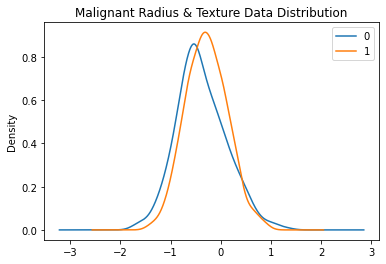

In [43]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X3)[0].plot(kind='kde')
pd.DataFrame(X3)[1].plot(kind='kde')
plt.legend()
plt.show()

In [44]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.3, random_state=0)

### 3.4.2. Create Model

In [45]:
# create model
gnb2_3 = GaussianNB()

### 3.4.3. Train Model

In [46]:
# train model on training dataset
gnb2_3.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.4.4. Test Model

In [47]:
# predict on validate set
y_test_pred = gnb2_3.predict(X_test)

# predict on train set
y_train_pred = gnb2_3.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.261307
Validating MSE = 0.397661
F1 Score = 0.861789
Precision Score = 0.883333
Recall Score = 0.841270
ROC-AUC Score = 0.888228

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.900585
Confusion Matrix = 
[[101   7]
 [ 10  53]]
True Negative: 101
False Positive: 7
False Negative: 10
True Positive: 53


## 3.5. Case 4: Add Noise 4 To The Dataset

### 3.5.1. Data Processing

In [48]:
# add noise to dataset
X4 = X + noise_4

In [49]:
# view dataset
pd.DataFrame(X4).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.383816,-1.539930,-0.137091,-1.001233,-0.042894,0.517237,0.413014,1.406516,0.117556,-0.060837,...,0.482574,-1.659997,0.800261,0.192265,-0.592905,-0.377863,0.145350,0.471087,0.942610,-1.039330
1,0.859512,-0.838469,-0.161257,0.196935,-0.505025,-0.574327,-0.604017,-0.422474,0.013014,-1.086900,...,0.885003,-0.322069,0.092533,-0.464326,-0.507421,-1.063431,-0.488134,-0.222228,-0.571254,-0.680077
2,0.130195,-0.693344,0.002965,-0.662023,0.177298,0.258939,0.332072,0.644571,-0.456990,-0.707309,...,-0.046338,-0.371112,-0.264988,-0.232314,0.227686,-0.314483,-0.047565,1.090239,-0.408187,-0.149273
3,-0.829313,-0.742811,-1.108999,-0.262494,0.296471,0.268073,-0.279874,0.410838,0.594502,0.740342,...,-0.259142,-0.130664,-0.692917,-0.942791,0.279187,0.649614,0.373697,1.161802,1.745208,0.771495
4,0.221761,-0.868064,-0.146901,0.062328,0.066325,-0.556113,0.083426,0.436282,-0.614511,-0.475050,...,0.024228,-0.712167,-0.172273,-0.277990,-0.105981,-1.070979,0.332825,0.159190,-0.697639,-0.853080


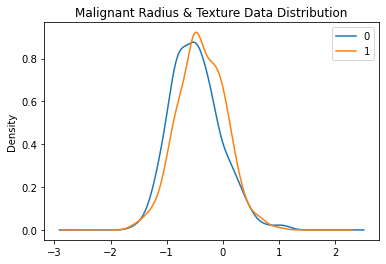

In [50]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X4)[0].plot(kind='kde')
pd.DataFrame(X4)[1].plot(kind='kde')
plt.legend()
plt.show()

In [51]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.3, random_state=0)

### 3.5.2. Create Model

In [52]:
# create model
gnb2_4 = GaussianNB()

### 3.5.3. Train Model

In [53]:
# train model on training dataset
gnb2_4.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.5.4. Test Model

In [54]:
# predict on validate set
y_test_pred = gnb2_4.predict(X_test)

# predict on train set
y_train_pred = gnb2_4.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.291457
Validating MSE = 0.444444
F1 Score = 0.848000
Precision Score = 0.854839
Recall Score = 0.841270
ROC-AUC Score = 0.878968

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.888889
Confusion Matrix = 
[[99  9]
 [10 53]]
True Negative: 99
False Positive: 9
False Negative: 10
True Positive: 53


## 3.6. Case 5: Add Noise 5 To The Dataset

### 3.6.1. Data Processing

In [55]:
# add noise to dataset
X5 = X + noise_5

In [56]:
# view dataset
pd.DataFrame(X5).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.025858,-0.646482,0.230692,-0.862081,-0.132344,0.405787,0.472731,1.234999,0.719449,0.325537,...,0.401619,-0.770379,0.376719,-0.065147,0.082382,0.136430,0.472655,0.801826,0.000402,0.351884
1,0.222487,-0.414775,0.266132,0.047924,-0.774216,-0.542785,-0.480351,-0.275378,-0.145874,-1.039904,...,0.551231,-0.805697,0.193289,-0.249813,-0.000151,-0.928779,-0.333348,1.080645,-0.569125,-0.820615
2,0.703915,-0.533593,0.549398,-0.054922,-0.451055,-0.797714,0.525328,0.536694,-0.317620,-0.173641,...,-0.256466,-0.185850,-0.223563,-0.194100,0.231014,0.197746,0.286590,1.272818,-0.102535,-0.451635
3,-1.010974,-0.145356,-0.625910,-0.750035,0.504017,0.642170,0.262886,-0.120027,0.817692,0.859795,...,-0.525829,-0.370310,-0.833321,-0.597147,0.662357,1.162525,0.232912,1.313075,0.883077,0.292239
4,0.220586,-0.799008,0.722240,0.340401,0.330733,-0.134876,-0.616839,0.400288,-0.333154,-1.352309,...,0.336318,-0.433373,-0.212808,-0.542172,-0.380255,-0.947532,-0.051996,0.289356,-0.601132,-0.201336


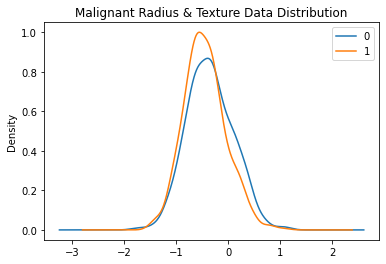

In [57]:
# plot the distribution of points
plt.title("Malignant Radius & Texture Data Distribution")
pd.DataFrame(X5)[0].plot(kind='kde')
pd.DataFrame(X5)[1].plot(kind='kde')
plt.legend()
plt.show()

In [58]:
# partition into training/test/validation 
X_train, X_test, y_train, y_test = train_test_split(X5, y, test_size=0.3, random_state=0)

### 3.6.2. Create Model

In [59]:
# create model
gnb2_5 = GaussianNB()

### 3.6.3. Train Model

In [60]:
# train model on training dataset
gnb2_5.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

### 3.6.4. Test Model

In [61]:
# predict on validate set
y_test_pred = gnb2_5.predict(X_test)

# predict on train set
y_train_pred = gnb2_5.predict(X_train)

accuracy = metrics.accuracy_score(y_test, y_test_pred)
f1 = metrics.f1_score(y_test, y_test_pred)
prec = metrics.precision_score(y_test, y_test_pred)
recall = metrics.recall_score(y_test, y_test_pred)
roc_auc = metrics.roc_auc_score(y_test, y_test_pred)
cm = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze())
tn, fp, fn, tp = metrics.confusion_matrix(y_test.squeeze(), y_test_pred.squeeze()).ravel()

print("Training MSE = %f" % metrics.mean_squared_error(y_train, y_train_pred))
print("Validating MSE = %f" % metrics.mean_squared_error(y_test, y_test_pred))
print('F1 Score = %f' % (f1))
print('Precision Score = %f' % (prec))
print('Recall Score = %f' % (recall))
print('ROC-AUC Score = %f' % (roc_auc))
print('\n-----------------------------')
print('SUBMIT')
print('-----------------------------')
print('Accuracy = %f' % (accuracy))
print(f'Confusion Matrix = \n{cm}')
print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive: {tp}')

Training MSE = 0.231156
Validating MSE = 0.350877
F1 Score = 0.878049
Precision Score = 0.900000
Recall Score = 0.857143
ROC-AUC Score = 0.900794

-----------------------------
SUBMIT
-----------------------------
Accuracy = 0.912281
Confusion Matrix = 
[[102   6]
 [  9  54]]
True Negative: 102
False Positive: 6
False Negative: 9
True Positive: 54
